<a href="https://colab.research.google.com/github/hoangvn111/Data-Cleaning-in-Python-Advanced/blob/master/Data_Cleaning_in_Python_Advanced.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Introduction

The dataset we will be working with is based off this CSV of Hacker News stories from September 2015 to September 2016. The columns in the dataset are explained below:

* id: The unique identifier from Hacker News for the story
* title: The title of the story
* url: The URL that the stories links to, if the story has a URL
* num_points: The number of points the story acquired, calculated as the total number of upvotes minus the total number of downvotes
* num_comments: The number of comments that were made on the story
* author: The username of the person who submitted the story
* created_at: The date and time at which the story was submitted

In [2]:
import pandas as pd 
hn = pd.read_csv('/content/drive/MyDrive/my_datasets/Data Cleaning in Python Advanced/hacker_news.csv')

In [3]:
hn.head()

,id,title,url,num_points,num_comments,author,created_at
0,12224879,Interactive Dynamic Video,http://www.interactivedynamicvideo.com/,386,52,ne0phyte,8/4/2016 11:52
1,11964716,Florida DJs May Face Felony for April Fools' W...,http://www.thewire.com/entertainment/2013/04/f...,2,1,vezycash,6/23/2016 22:20
2,11919867,Technology ventures: From Idea to Enterprise,https://www.amazon.com/Technology-Ventures-Ent...,3,1,hswarna,6/17/2016 0:01
3,10301696,Note by Note: The Making of Steinway L1037 (2007),http://www.nytimes.com/2007/11/07/movies/07ste...,8,2,walterbell,9/30/2015 4:12
4,10482257,Title II kills investment? Comcast and other I...,http://arstechnica.com/business/2015/10/comcas...,53,22,Deinos,10/31/2015 9:48


In [4]:
hn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20099 entries, 0 to 20098
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            20099 non-null  int64 
 1   title         20099 non-null  object
 2   url           17659 non-null  object
 3   num_points    20099 non-null  int64 
 4   num_comments  20099 non-null  int64 
 5   author        20099 non-null  object
 6   created_at    20099 non-null  object
dtypes: int64(3), object(4)
memory usage: 1.1+ MB


## Regular Expression Basics

### The Regular Expression Module

We're going to use this technique to find out how many times Python is mentioned in the title of stories in our Hacker News dataset. We'll use a set to check for both Python with a capital 'P' and python with a lowercase 'p'.

In [5]:
# import module re
import re 

# extract a list 'titles' containing all the titles from dataset
titles = hn['title'].tolist()

python_mentions = 0

pattern = '[Pp]ython'

for title in titles:
    if re.search(pattern, title):
        python_mentions += 1

print(python_mentions)

160


### Counting Matches with pandas Methods

In [6]:
titles = hn['title']
pattern = '[Pp]ython'

python_mentions = titles.str.contains(pattern).sum()

print(python_mentions)

160


### Using Regular Expressions to Select Data

In [7]:
titles = hn['title']

ruby_titles = titles[titles.str.contains('[Rr]uby')]

print(ruby_titles.head())

190                    Ruby on Google AppEngine Goes Beta
484          Related: Pure Ruby Relational Algebra Engine
1388    Show HN: HTTPalooza  Ruby's greatest HTTP clie...
1949    Rewriting a Ruby C Extension in Rust: How a Na...
2022    Show HN: CrashBreak  Reproduce exceptions as f...
Name: title, dtype: object


### Quantifiers

In [8]:
pattern = 'e-?mail'
email_bool = titles.str.contains(pattern)
email_count = email_bool.sum()
email_titles = titles[email_bool]

print(email_count)
print('\n')
print(email_titles.head())

86


119     Show HN: Send an email from your shell to your...
313         Disposable emails for safe spam free shopping
1361    Ask HN: Doing cold emails? helps us prove this...
1750    Protect yourself from spam, bots and phishing ...
2421                   Ashley Madison hack treating email
Name: title, dtype: object


### Character Classes 

In [9]:
pattern = '\[\w+\]'
tag_titles = titles[titles.str.contains(pattern)]
tag_count = titles.str.contains(pattern).sum()

print(tag_count)
print('\n')
print(tag_titles.head())


444


66     Analysis of 114 propaganda sources from ISIS, ...
100    Munich Gunman Got Weapon from the Darknet [Ger...
159         File indexing and searching for Plan 9 [pdf]
162    Attack on Kunduz Trauma Centre, Afghanistan  I...
195               [Beta] Speedtest.net  HTML5 Speed Test
Name: title, dtype: object


### Accessing the Matching Text with Capture Groups 

In [10]:
pattern = r'\[(\w+)\]'

tag_titles = titles.str.extract(pattern, expand=False)
tag_freq = tag_titles.value_counts(dropna=False)

print(tag_freq)
print('\n')
print(tag_titles.head())

NaN            19655
pdf              276
video            111
audio              3
2015               3
2014               2
slides             2
beta               2
repost             1
NSFW               1
Excerpt            1
GOST               1
map                1
Beta               1
crash              1
gif                1
survey             1
Challenge          1
1996               1
Live               1
CSS                1
2008               1
song               1
HBR                1
SPA                1
Skinnywhale        1
5                  1
Australian         1
Map                1
coffee             1
German             1
transcript         1
png                1
USA                1
Petition           1
ANNOUNCE           1
Benchmark          1
satire             1
Ubuntu             1
Videos             1
much               1
updated            1
Python             1
detainee           1
comic              1
Infograph          1
blank              1
ask          

### Negative Character Classes 

We can see that there are a number of matches that contain Java as part of the word JavaScript. We want to exclude these titles from matching so we get an accurate count.

Let's use the negative set [^Ss] to exclude instances like JavaScript and Javascript:

In [11]:
pattern = r'[Jj]ava[^Ss]'

java_titles = titles[titles.str.contains(pattern)]

print(java_titles.head())

436     Unikernel Power Comes to Java, Node.js, Go, an...
811     Ask HN: Are there any projects or compilers wh...
1840                    Adopting RxJava on the Airbnb App
1972          Node.js vs. Java: Which Is Faster for APIs?
2093                    Java EE and Microservices in 2016
Name: title, dtype: object


### Word Boundaries 

While the negative set was effective in removing any bad matches that mention JavaScript, it also had the side-effect of removing any titles where Java occurs at the end of the string, like this title:

Pippo  Web framework in Java

In [12]:
pattern = r'\b[Jj]ava\b'

java_titles = titles[titles.str.contains(pattern)]

print(java_titles.head())

436     Unikernel Power Comes to Java, Node.js, Go, an...
811     Ask HN: Are there any projects or compilers wh...
1023                         Pippo  Web framework in Java
1972          Node.js vs. Java: Which Is Faster for APIs?
2093                    Java EE and Microservices in 2016
Name: title, dtype: object


### Matching at the Start and End of Strings

In [13]:
pattern_beginning = r"^\[\w+\]"
beginning_count = titles.str.contains(pattern_beginning).sum()

pattern_ending =  r"\[\w+\]$"
ending_count = titles.str.contains(pattern_ending).sum()

print(beginning_count)
print('\n')
print(ending_count)

15


417


### Challenge: Using Flags to Modify Regex Pattern

we can use **flags** to specify that our regular expression should ignore case

In [14]:
import re

email_tests = pd.Series(['email', 'Email', 'e Mail', 'e mail', 'E-mail',
              'e-mail', 'eMail', 'E-Mail', 'EMAIL', 'emails', 'Emails',
              'E-Mails'])

pattern = r'\be[\-\s]?mails?\b'

email_mentions = email_tests[email_tests.str.contains(pattern, flags=re.I)]

print(email_mentions)

0       email
1       Email
2      e Mail
3      e mail
4      E-mail
5      e-mail
6       eMail
7      E-Mail
8       EMAIL
9      emails
10     Emails
11    E-Mails
dtype: object


## Advanced Regular Expression

### Introduction

In [15]:
pattern = r'sql'

sql_counts = titles.str.contains(pattern, flags=re.I).sum()

print(sql_counts)

108


In [16]:
titles[titles.str.contains(pattern, flags=re.I)].head(20)

9       Crate raises $4M seed round for its next-gen S...
142                  PostgreSQL: Linux VS Windows  part 2
221                  MemSQL (YC W11) Raises $36M Series C
394                          The History of SQL Injection
419     Pentesterlab Tutorial  SQL injection to web ad...
513                         Crab  SQL for your filesystem
683                     SQLite: The art of keep it simple
882            Pgmemcahe :A PostgreSQL memcache functions
1160    How to choose an in-memory NoSQL solution: Per...
1164    Show HN: Migrate  Sane database/sql migrations...
1197    Postgraphql: A GraphQL schema created by refle...
1327                             Outlier Detection in SQL
1370    MI6 (SIS) Is Developing a Node.js, Angular, No...
1612                          Appropriate Uses for SQLite
1960    Microsoft SQL Server Images Available on Googl...
2430       Tracker: Ingesting MySQL data at scale  Part 2
2432               SQL for NoSQL: Couchbase N1QL Tutorial
2543          

In [17]:
# find only SQL not include SQLlite, PostgreSQL, NoSQL, ...
titles[titles.str.contains(r'\bsql\b', flags=re.I)] 

9        Crate raises $4M seed round for its next-gen S...
394                           The History of SQL Injection
419      Pentesterlab Tutorial  SQL injection to web ad...
513                          Crab  SQL for your filesystem
1164     Show HN: Migrate  Sane database/sql migrations...
1327                              Outlier Detection in SQL
1960     Microsoft SQL Server Images Available on Googl...
2432                SQL for NoSQL: Couchbase N1QL Tutorial
2543                   PacketQ: SQL queries for pcap files
2648       Hacking Microsoft SQL Server Without a Password
3348     Show HN: Embed a Search-box that converts plai...
4944     SQL vs. NoSQL: you do want to have a relationa...
5021     Microsoft SQL Server Developer Edition Is Now ...
5112     Microsoft Azure SQL Database provides unparall...
5654     Independent SQL-On-Hadoop Benchmark of SparkSQ...
5726     Show HN: SQL Back End for the Static Web and M...
5844     Node-Data is unique framework to support sql,n.

### Capture Groups 

In [18]:
hn_sql = hn[hn['title'].str.contains(r"\w+SQL", flags=re.I)].copy()
hn_sql['flavor'] = hn_sql['title'].str.extract(r'(\w+SQL)', flags=re.I, expand=False)
hn_sql['flavor'].value_counts()

PostgreSQL    27
NoSQL         16
MySQL         12
mySql          1
nosql          1
SparkSQL       1
CloudSQL       1
MemSQL         1
Name: flavor, dtype: int64

In [19]:
# duplication due to varied capitalization in this frequency table:
# NoSQL and nosql
# MySQL and mysql

# change all to lowercase
hn_sql['flavor'] = hn_sql['flavor'].str.lower()
hn_sql['flavor'].value_counts()

postgresql    27
nosql         17
mysql         13
cloudsql       1
sparksql       1
memsql         1
Name: flavor, dtype: int64

In [20]:
sql_pivot = hn_sql.pivot_table(values='num_comments', index='flavor')
sql_pivot

,num_comments
flavor,
cloudsql,5.000000
memsql,14.000000
mysql,12.230769
nosql,14.529412
postgresql,25.962963
sparksql,1.000000


### Using Capture Groups to Extract Data

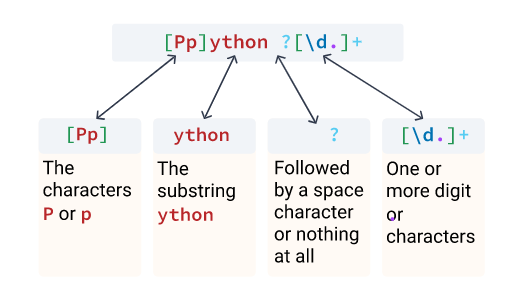

In [21]:
titles

0                                Interactive Dynamic Video
1        Florida DJs May Face Felony for April Fools' W...
2             Technology ventures: From Idea to Enterprise
3        Note by Note: The Making of Steinway L1037 (2007)
4        Title II kills investment? Comcast and other I...
                               ...                        
20094    How Purism Avoids Intels Active Management Tec...
20095            YC Application Translated and Broken Down
20096    Microkernels are slow and Elvis didn't do no d...
20097                        How Product Hunt really works
20098    RoboBrowser: Your friendly neighborhood web sc...
Name: title, Length: 20099, dtype: object

We'll use a capture group to capture the version number after the word "Python," and then build a frequency table of the different versions.

In [22]:
pattern = r'[Pp]ython ([\d.]+)'
py_versions_freq = dict(titles.str.extract(pattern, expand=False).value_counts())
py_versions_freq

{'1.5': 1,
 '2': 3,
 '2.7': 1,
 '3': 10,
 '3.5': 3,
 '3.5.0': 1,
 '3.6': 2,
 '4': 1,
 '8': 1}

### Counting Mentions of the 'C' Language

We'll counting the mentions of the C language.

In [23]:
pattern = r'\b[Cc]\b'

c = titles[titles.str.contains(pattern)]
c

13                  Custom Deleters for C++ Smart Pointers
220                         Lisp, C++: Sadness in my heart
221                   MemSQL (YC W11) Raises $36M Series C
353      VW C.E.O. Personally Apologized to President O...
365                       The new C standards are worth it
                               ...                        
19667                         Ill-Advised C++ Rant, Part 2
19799    Introducing a new, advanced Visual C++ code op...
19829    Ferret: Compiling a Subset of Clojure to ISO C...
19933    Lightweight C library to parse NMEA 0183 sente...
19997                                    Proposal: C.UTF-8
Name: title, Length: 190, dtype: object

Immediately, our results are reasonably relevant. However, we can quickly identify a few match types we want to prevent:

* Mentions of C++, a distinct language from C.
* Cases where the letter C is followed by a period, like in the substring C.E.O.

Let's use a negative set to prevent matches for the + character and the . character.

In [24]:
pattern = r'\b[Cc]\b[^.+]'

c_mentions = titles[titles.str.contains(pattern)]
c_mentions

365                       The new C standards are worth it
444            Moz raises $10m Series C from Foundry Group
521           Fuchsia: Micro kernel written in C by Google
1307             Show HN: Yupp, yet another C preprocessor
1326                      The C standard formalized in Coq
                               ...                        
18543                 C-style for loops removed from Swift
18549            Show HN: An awesome C library for Windows
18649                 Python vs. C/C++ in embedded systems
19151                      Ask HN: How to learn C in 2016?
19933    Lightweight C library to parse NMEA 0183 sente...
Name: title, Length: 84, dtype: object

### Using Lookarounds to Control Matches Based on Surrounding Text

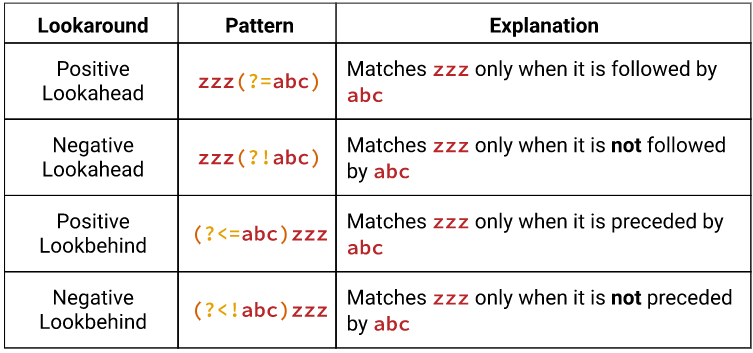

* Keep excluding matches that are followed by . or +, but still match cases where "C" falls at the end of the sentence.
* Exclude matches that have the word 'Series' immediately preceding them.

In [25]:
pattern = r"(?<!Series\s)\b[Cc]\b((?![.+])|\.$)"
c_mentions = titles[titles.str.contains(pattern)]
c_mentions

/usr/local/lib/python3.7/dist-packages/pandas/core/strings.py:2001: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


365                       The new C standards are worth it
521           Fuchsia: Micro kernel written in C by Google
1307             Show HN: Yupp, yet another C preprocessor
1326                      The C standard formalized in Coq
1365                           GNU C Library 2.23 released
                               ...                        
18543                 C-style for loops removed from Swift
18549            Show HN: An awesome C library for Windows
18649                 Python vs. C/C++ in embedded systems
19151                      Ask HN: How to learn C in 2016?
19933    Lightweight C library to parse NMEA 0183 sente...
Name: title, Length: 102, dtype: object

### Backreferences: Using Capture Groups in a RegEx Pattern

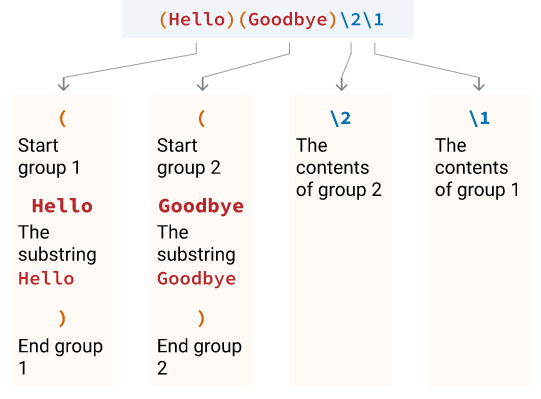

The regular expression above will match the text **HelloGoodbyeGoodbyeHello**.

Write a regular expression to match cases of repeated words:

* We'll define a word as a series of one or more word characters preceded and followed by a boundary anchor.
* We'll define repeated words as the same word repeated twice, separated by a single whitespace character.

In [31]:
pattern = r'\b(\w+)(\s)\1\b'
repeated_words = titles[titles.str.contains(pattern)]

repeated_words

/usr/local/lib/python3.7/dist-packages/pandas/core/strings.py:2001: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


3102                  Silicon Valley Has a Problem Problem
3176                Wire Wire: A West African Cyber Threat
3178                         Flexbox Cheatsheet Cheatsheet
4797                            The Mindset Mindset (2015)
7276     Valentine's Day Special: Bye Bye Tinder, Flirt...
10371    Mcdonalds copying cyriak  cows cows cows in th...
11575                                    Bang Bang Control
11901          Cordless Telephones: Bye Bye Privacy (1991)
12697          Solving the the Monty-Hall-Problem in Swift
15049    Bye Bye Webrtc2SIP: WebRTC with Asterisk and A...
15839          Intellij-Rust Rust Plugin for IntelliJ IDEA
Name: title, dtype: object

### Substituting Regular Expression Mathces

Series.str.replace() method and a regular expression

Use a regular expression to replace each of the matches in email_variations with "email"

In [32]:
email_variations = pd.Series(['email', 'Email', 'e Mail',
                        'e mail', 'E-mail', 'e-mail',
                        'eMail', 'E-Mail', 'EMAIL'])

pattern = r'\be[-\s]?mail'

titles_clean = titles.str.replace(pattern, 'email', flags=re.I)

titles_clean

0                                Interactive Dynamic Video
1        Florida DJs May Face Felony for April Fools' W...
2             Technology ventures: From Idea to Enterprise
3        Note by Note: The Making of Steinway L1037 (2007)
4        Title II kills investment? Comcast and other I...
                               ...                        
20094    How Purism Avoids Intels Active Management Tec...
20095            YC Application Translated and Broken Down
20096    Microkernels are slow and Elvis didn't do no d...
20097                        How Product Hunt really works
20098    RoboBrowser: Your friendly neighborhood web sc...
Name: title, Length: 20099, dtype: object

### Extracting Domains from URLs

Extract domains form URLs

In [37]:
test_urls = pd.Series([
 'https://www.amazon.com/Technology-Ventures-Enterprise-Thomas-Byers/dp/0073523429',
 'http://www.interactivedynamicvideo.com/',
 'http://www.nytimes.com/2007/11/07/movies/07stein.html?_r=0',
 'http://evonomics.com/advertising-cannot-maintain-internet-heres-solution/',
 'HTTPS://github.com/keppel/pinn',
 'Http://phys.org/news/2015-09-scale-solar-youve.html',
 'https://iot.seeed.cc',
 'http://www.bfilipek.com/2016/04/custom-deleters-for-c-smart-pointers.html',
 'http://beta.crowdfireapp.com/?beta=agnipath',
 'https://www.valid.ly?param',
 'http://css-cursor.techstream.org'
])

pattern = r'https?://([\w\-\.]+)'

test_urls_clean = test_urls.str.extract(pattern, expand=False, flags=re.I)

domains = hn['url'].str.extract(pattern, expand=False, flags=re.I)

top_domains = domains.value_counts().head(5)

top_domains

github.com             1008
medium.com              825
www.nytimes.com         525
www.theguardian.com     248
techcrunch.com          245
Name: url, dtype: int64

### Using URL Parts Using Multiple Capture Groups

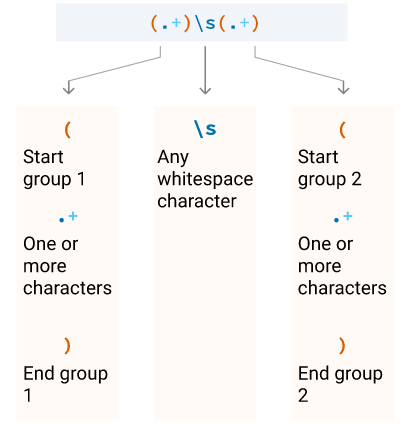

In [64]:
pattern = r"(.+)\s(.+)"

created_at = hn['created_at']
dates_times = created_at.str.extract(pattern)

print(dates_times)

                0      1
0        8/4/2016  11:52
1       6/23/2016  22:20
2       6/17/2016   0:01
3       9/30/2015   4:12
4      10/31/2015   9:48
...           ...    ...
20094   8/29/2016   2:22
20095   10/6/2015  14:57
20096    1/2/2016   0:49
20097  12/15/2015  19:32
20098   5/12/2016   1:43

[20099 rows x 2 columns]


We'll extract each of the three component parts of the URLs:

1. Protocol
2. Domain
3. Page path

In [76]:
pattern = r"(https?)://([\w\.\-]+)/?(.*)"
test_url_parts = test_urls.str.extract(pattern, flags=re.I)

url_parts = hn['url'].str.extract(pattern, flags=re.I)

url_parts

,0,1,2
0,http,www.interactivedynamicvideo.com,
1,http,www.thewire.com,entertainment/2013/04/florida-djs-april-fools-...
2,https,www.amazon.com,Technology-Ventures-Enterprise-Thomas-Byers/dp...
3,http,www.nytimes.com,2007/11/07/movies/07stein.html?_r=0
4,http,arstechnica.com,business/2015/10/comcast-and-other-isps-boost-...
...,...,...,...
20094,https,puri.sm,philosophy/how-purism-avoids-intels-active-man...
20095,https,medium.com,@zreitano/the-yc-application-broken-down-and-t...
20096,http,blog.darknedgy.net,technology/2016/01/01/0/
20097,https,medium.com,@benjiwheeler/how-product-hunt-really-works-d8...


### Using Named Capture Groups to Extract Data

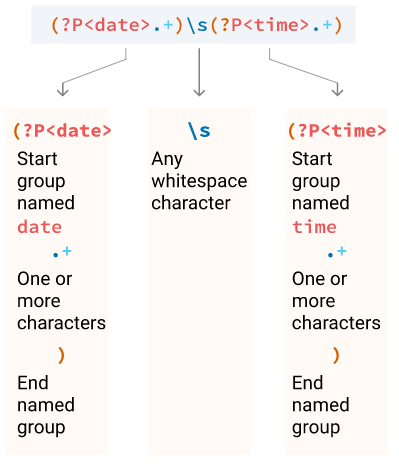

In [79]:
pattern = r"(?P<protocol>https?)://(?P<domain>[\w\.\-]+)/?(?P<path>.*)"

url_parts = hn['url'].str.extract(pattern, flags=re.I)

url_paths

,protocol,domain,path
0,http,www.interactivedynamicvideo.com,
1,http,www.thewire.com,entertainment/2013/04/florida-djs-april-fools-...
2,https,www.amazon.com,Technology-Ventures-Enterprise-Thomas-Byers/dp...
3,http,www.nytimes.com,2007/11/07/movies/07stein.html?_r=0
4,http,arstechnica.com,business/2015/10/comcast-and-other-isps-boost-...
...,...,...,...
20094,https,puri.sm,philosophy/how-purism-avoids-intels-active-man...
20095,https,medium.com,@zreitano/the-yc-application-broken-down-and-t...
20096,http,blog.darknedgy.net,technology/2016/01/01/0/
20097,https,medium.com,@benjiwheeler/how-product-hunt-really-works-d8...
